# Cipher Challenge
From [Simon Singh's The Code Book](https://simonsingh.net/cryptography/cipher-challenge/the-ciphertexts/)
## Stage 1
Simple Monoalphabetic Substitution Cipher

In [1]:
cipher_text = "BT JPX RMLX PCUV AMLX ICVJP IBTWXVR CI M LMT’R PMTN, MTN YVCJX CDXV MWMBTRJ JPX AMTNGXRJBAH UQCT JPX QGMRJXV CI JPX YMGG CI JPX HBTW’R QMGMAX; MTN JPX HBTW RMY JPX QMVJ CI JPX PMTN JPMJ YVCJX. JPXT JPX HBTW’R ACUTJXTMTAX YMR APMTWXN, MTN PBR JPCUWPJR JVCUFGXN PBL, RC JPMJ JPX SCBTJR CI PBR GCBTR YXVX GCCRXN, MTN PBR HTXXR RLCJX CTX MWMBTRJ MTCJPXV. JPX HBTW AVBXN MGCUN JC FVBTW BT JPX MRJVCGCWXVR, JPX APMGNXMTR, MTN JPX RCCJPRMEXVR. MTN JPX HBTW RQMHX, MTN RMBN JC JPX YBRX LXT CI FMFEGCT, YPCRCXDXV RPMGG VXMN JPBR YVBJBTW, MTN RPCY LX JPX BTJXVQVXJMJBCT JPXVXCI, RPMGG FX AGCJPXN YBJP RAM"

In [195]:
print(cipher_text)

BT JPX RMLX PCUV AMLX ICVJP IBTWXVR CI M LMT’R PMTN, MTN YVCJX CDXV MWMBTRJ JPX AMTNGXRJBAH UQCT JPX QGMRJXV CI JPX YMGG CI JPX HBTW’R QMGMAX; MTN JPX HBTW RMY JPX QMVJ CI JPX PMTN JPMJ YVCJX. JPXT JPX HBTW’R ACUTJXTMTAX YMR APMTWXN, MTN PBR JPCUWPJR JVCUFGXN PBL, RC JPMJ JPX SCBTJR CI PBR GCBTR YXVX GCCRXN, MTN PBR HTXXR RLCJX CTX MWMBTRJ MTCJPXV. JPX HBTW AVBXN MGCUN JC FVBTW BT JPX MRJVCGCWXVR, JPX APMGNXMTR, MTN JPX RCCJPRMEXVR. MTN JPX HBTW RQMHX, MTN RMBN JC JPX YBRX LXT CI FMFEGCT, YPCRCXDXV RPMGG VXMN JPBR YVBJBTW, MTN RPCY LX JPX BTJXVQVXJMJBCT JPXVXCI, RPMGG FX AGCJPXN YBJP RAM


Let's break down the frequency of the letters in the cipher text.

In [18]:
import altair as alt

In [20]:
from collections import Counter

In [24]:
cipher_freq = sorted(Counter(cipher_text).items())

In [26]:
import pandas as pd

In [124]:
cipher_text_df = (pd.DataFrame.from_records(cipher_freq, columns=["letter", "freq"])
                  .iloc[4:27] # remove special characters (spaces, points, ...)
                  .reset_index(drop=True)
                 )

In [44]:
cipher_text_df.tail()

,letter,freq
18,U,6
19,V,22
20,W,13
21,X,56
22,Y,11


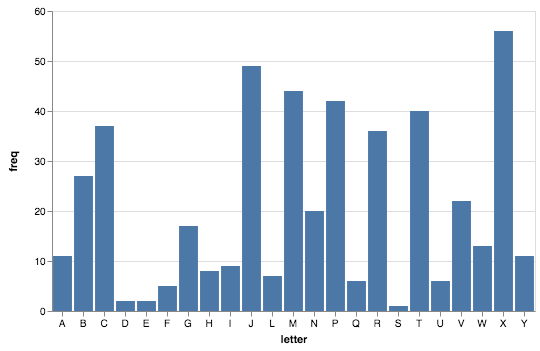

In [56]:
alt.Chart(cipher_text_df).mark_bar().encode(
    x=alt.X("letter:O", axis=alt.Axis(labelAngle=0)),
    y=alt.Y("freq:Q")
)

From http://norvig.com/mayzner.html

In [49]:
from io import StringIO

In [110]:
english_freq = pd.read_fwf(StringIO("""LET COUNT
E   445.2
T   330.5
A   286.5
O   272.3
I   269.7
N   257.8
S   232.1
R   223.8
H   180.1
L   145.0
D   136.0
C   119.2
U   97.3
M   89.5
F   85.6
P   76.1
G   66.6
W   59.7
Y   59.3
B   52.9
V   37.5
K   19.3
X   8.4
J   5.7
Q   4.3
Z   3.2"""), names=["letter", "eng_freq"], header=0)

In [127]:
cipher_text_df.sort_values(by="freq", inplace=True, ascending=False)

In [114]:
cipher_text_df.head()

,letter,freq
16,S,0.017857
3,D,0.035714
4,E,0.035714
5,F,0.089286
18,U,0.107143


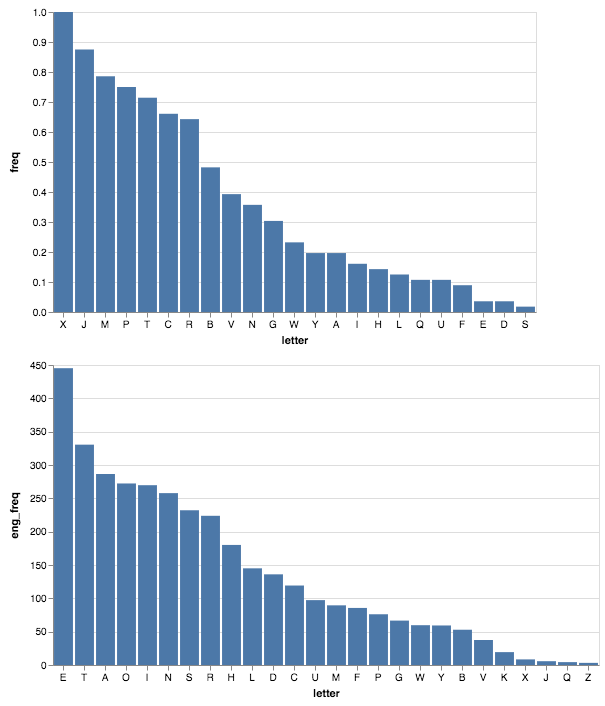

In [116]:
alt.Chart(cipher_text_df).mark_bar().encode(
    x=alt.X("letter:N", 
            axis=alt.Axis(labelAngle=0), 
            sort=alt.SortField(field='freq', op='sum', order='descending')),
    y=alt.Y("freq:Q"),
) & alt.Chart(english_freq).mark_bar().encode(
    x=alt.X("letter:N", 
            axis=alt.Axis(labelAngle=0), 
            sort=alt.SortField(field='eng_freq', op='sum', order='descending')),
    y="eng_freq:Q"
)

In [129]:
cipher_dict = dict(zip(cipher_text_df.letter.values, english_freq.letter.values))

In [131]:
deciphered = ""
for letter in cipher_text:
    if letter not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        new_letter = letter
    else:
        new_letter = cipher_dict[letter]
    deciphered += new_letter

In [132]:
deciphered

'RI TOE SAGE ONYH MAGE FNHTO FRICEHS NF A GAI’S OAIL, AIL UHNTE NVEH ACARIST TOE MAILDESTRMP YWNI TOE WDASTEH NF TOE UADD NF TOE PRIC’S WADAME; AIL TOE PRIC SAU TOE WAHT NF TOE OAIL TOAT UHNTE. TOEI TOE PRIC’S MNYITEIAIME UAS MOAICEL, AIL ORS TONYCOTS THNYBDEL ORG, SN TOAT TOE XNRITS NF ORS DNRIS UEHE DNNSEL, AIL ORS PIEES SGNTE NIE ACARIST AINTOEH. TOE PRIC MHREL ADNYL TN BHRIC RI TOE ASTHNDNCEHS, TOE MOADLEAIS, AIL TOE SNNTOSAKEHS. AIL TOE PRIC SWAPE, AIL SARL TN TOE URSE GEI NF BABKDNI, UONSNEVEH SOADD HEAL TORS UHRTRIC, AIL SONU GE TOE RITEHWHETATRNI TOEHENF, SOADD BE MDNTOEL URTO SMA'

In [133]:
cipher_text

'BT JPX RMLX PCUV AMLX ICVJP IBTWXVR CI M LMT’R PMTN, MTN YVCJX CDXV MWMBTRJ JPX AMTNGXRJBAH UQCT JPX QGMRJXV CI JPX YMGG CI JPX HBTW’R QMGMAX; MTN JPX HBTW RMY JPX QMVJ CI JPX PMTN JPMJ YVCJX. JPXT JPX HBTW’R ACUTJXTMTAX YMR APMTWXN, MTN PBR JPCUWPJR JVCUFGXN PBL, RC JPMJ JPX SCBTJR CI PBR GCBTR YXVX GCCRXN, MTN PBR HTXXR RLCJX CTX MWMBTRJ MTCJPXV. JPX HBTW AVBXN MGCUN JC FVBTW BT JPX MRJVCGCWXVR, JPX APMGNXMTR, MTN JPX RCCJPRMEXVR. MTN JPX HBTW RQMHX, MTN RMBN JC JPX YBRX LXT CI FMFEGCT, YPCRCXDXV RPMGG VXMN JPBR YVBJBTW, MTN RPCY LX JPX BTJXVQVXJMJBCT JPXVXCI, RPMGG FX AGCJPXN YBJP RAM'

This didn't work at all (but I got to play with altair, which is always nice). Let's use another information in the text: we have the punctuation and the words separated. We can look up for frequent words.

In [137]:
Counter(cipher_text.split()).most_common(10)

[('JPX', 17),
 ('MTN', 8),
 ('CI', 6),
 ('HBTW', 3),
 ('PBR', 3),
 ('BT', 2),
 ('MWMBTRJ', 2),
 ('HBTW’R', 2),
 ('JPMJ', 2),
 ('JC', 2)]

I started with the 2 words above as "THE" and "AND", and then found letters one after another, updating the dict going along.
The function beneath is useful to show the deciphered letters in upper case and the yet to be deduced letters in lower case.

In [198]:
def decipher_with_dict(cipher_dict):
    deciphered = ""
    for letter in cipher_text:
        deciphered += cipher_dict.get(letter, letter.lower())
    return deciphered

In [199]:
decipher_with_dict(dict(zip("JPXMTN", "THEAND")))

'bN THE rAlE Hcuv aAlE icvTH ibNwEvr ci A lAN’r HAND, AND yvcTE cdEv AwAbNrT THE aANDgErTbah uqcN THE qgArTEv ci THE yAgg ci THE hbNw’r qAgAaE; AND THE hbNw rAy THE qAvT ci THE HAND THAT yvcTE. THEN THE hbNw’r acuNTENANaE yAr aHANwED, AND Hbr THcuwHTr TvcufgED Hbl, rc THAT THE scbNTr ci Hbr gcbNr yEvE gccrED, AND Hbr hNEEr rlcTE cNE AwAbNrT ANcTHEv. THE hbNw avbED AgcuD Tc fvbNw bN THE ArTvcgcwEvr, THE aHAgDEANr, AND THE rccTHrAeEvr. AND THE hbNw rqAhE, AND rAbD Tc THE ybrE lEN ci fAfegcN, yHcrcEdEv rHAgg vEAD THbr yvbTbNw, AND rHcy lE THE bNTEvqvETATbcN THEvEci, rHAgg fE agcTHED ybTH raA'

Some words seem nice, like "THE HAND THAT", so we seem in the right track!
We can notice the " 'S " pattern with the punctuation, so "r" -> "S". The first word looks like "IN", so let's try "b" -> "I"

In [200]:
decipher_with_dict(dict(zip("JPXMTNRB", "THEANDSI")))

'IN THE SAlE Hcuv aAlE icvTH iINwEvS ci A lAN’S HAND, AND yvcTE cdEv AwAINST THE aANDgESTIah uqcN THE qgASTEv ci THE yAgg ci THE hINw’S qAgAaE; AND THE hINw SAy THE qAvT ci THE HAND THAT yvcTE. THEN THE hINw’S acuNTENANaE yAS aHANwED, AND HIS THcuwHTS TvcufgED HIl, Sc THAT THE scINTS ci HIS gcINS yEvE gccSED, AND HIS hNEES SlcTE cNE AwAINST ANcTHEv. THE hINw avIED AgcuD Tc fvINw IN THE ASTvcgcwEvS, THE aHAgDEANS, AND THE SccTHSAeEvS. AND THE hINw SqAhE, AND SAID Tc THE yISE lEN ci fAfegcN, yHcScEdEv SHAgg vEAD THIS yvITINw, AND SHcy lE THE INTEvqvETATIcN THEvEci, SHAgg fE agcTHED yITH SaA'

'ci' could be "OF", let's try that; and at the end of the text, the big word looks like "INTERPRETATION", so we get 'vq' -> 'RP'

In [201]:
decipher_with_dict(dict(zip("JPXMTNRBCIVQ", "THEANDSIOFRP")))

'IN THE SAlE HOuR aAlE FORTH FINwERS OF A lAN’S HAND, AND yROTE OdER AwAINST THE aANDgESTIah uPON THE PgASTER OF THE yAgg OF THE hINw’S PAgAaE; AND THE hINw SAy THE PART OF THE HAND THAT yROTE. THEN THE hINw’S aOuNTENANaE yAS aHANwED, AND HIS THOuwHTS TROufgED HIl, SO THAT THE sOINTS OF HIS gOINS yERE gOOSED, AND HIS hNEES SlOTE ONE AwAINST ANOTHER. THE hINw aRIED AgOuD TO fRINw IN THE ASTROgOwERS, THE aHAgDEANS, AND THE SOOTHSAeERS. AND THE hINw SPAhE, AND SAID TO THE yISE lEN OF fAfegON, yHOSOEdER SHAgg READ THIS yRITINw, AND SHOy lE THE INTERPRETATION THEREOF, SHAgg fE agOTHED yITH SaA'

And so on, until we find

In [203]:
decipher_with_dict(dict(zip("JPXMTNRBCVQIWLUHYAGFEDS", "THEANDSIORPFGMUKWCLBYVJ")))

'IN THE SAME HOUR CAME FORTH FINGERS OF A MAN’S HAND, AND WROTE OVER AGAINST THE CANDLESTICK UPON THE PLASTER OF THE WALL OF THE KING’S PALACE; AND THE KING SAW THE PART OF THE HAND THAT WROTE. THEN THE KING’S COUNTENANCE WAS CHANGED, AND HIS THOUGHTS TROUBLED HIM, SO THAT THE JOINTS OF HIS LOINS WERE LOOSED, AND HIS KNEES SMOTE ONE AGAINST ANOTHER. THE KING CRIED ALOUD TO BRING IN THE ASTROLOGERS, THE CHALDEANS, AND THE SOOTHSAYERS. AND THE KING SPAKE, AND SAID TO THE WISE MEN OF BABYLON, WHOSOEVER SHALL READ THIS WRITING, AND SHOW ME THE INTERPRETATION THEREOF, SHALL BE CLOTHED WITH SCA'

With comes from here: https://www.kingjamesbibleonline.org/Daniel-5-5/
And that's it!

In [204]:
Counter(decipher_with_dict(dict(zip("JPXMTNRBCVQIWLUHYAGFEDS", "THEANDSIORPFGMUKWCLBYVJ"))).split()).most_common(10)

[('THE', 17),
 ('AND', 8),
 ('OF', 6),
 ('KING', 3),
 ('HIS', 3),
 ('IN', 2),
 ('AGAINST', 2),
 ('KING’S', 2),
 ('THAT', 2),
 ('TO', 2)]